In [1]:
import pandas as pd
import zipfile
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Data/House_Sale/House_Sale.zip')  #aloca o arquivo zip

data = pd.read_csv(zf.open('kc_house_data.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [4]:
data.head() # mostra o cabeçalho presentes nas amostras do conjunto de treinamento

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
print(data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
data = data.drop(['id', 'date', 'lat', 'long','zipcode' ], axis=1) # remove a coluna de IDs
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503


In [7]:
data.shape 

(21613, 16)

In [8]:
data.isnull().sum() # dados faltantes ou NaN

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(data['sqft_above'].isnull().values==True)[0]

array([10, 17])

In [10]:
print(data.values[10])
print(data.values[17])

[6.625e+05 3.000e+00 2.500e+00 3.560e+03 9.796e+03 1.000e+00 0.000e+00
 0.000e+00 3.000e+00 8.000e+00       nan 1.700e+03 1.965e+03 0.000e+00
 2.210e+03 8.925e+03]
[4.850e+05 4.000e+00 1.000e+00 1.600e+03 4.300e+03 1.500e+00 0.000e+00
 0.000e+00 4.000e+00 7.000e+00       nan 0.000e+00 1.916e+03 0.000e+00
 1.610e+03 4.300e+03]


In [11]:
data = data.drop([10, 17])

In [12]:
data.isnull().sum() # dados faltantes ou NaN

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
data['bedrooms'].value_counts()

3     9823
4     6881
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
data.shape

(21611, 16)

In [15]:
import plotly.express as px

In [16]:
atributos = data.columns[0:15]
print(atributos)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15'],
      dtype='object')


In [17]:
fig = px.scatter_matrix(data, dimensions=data.columns[0:16])
fig.update_layout(
    autosize=True,
    width=3000,
    height=3000,
)
fig.update_yaxes(automargin=True)

fig.show()

In [18]:
#Tabela de correlação
corr = data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,0.585377,0.082448
bedrooms,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,0.391670,0.029252
bathrooms,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,0.568626,0.087163
sqft_living,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,0.756440,0.183301
sqft_lot,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,0.144605,0.718556
floors,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,0.279907,-0.011275
waterfront,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.086463,0.030702
view,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.280440,0.072569
condition,0.036379,0.028433,-0.124917,-0.058689,-0.008951,-0.263808,0.016655,0.045995,1.000000,-0.144647,-0.158206,0.174273,-0.361384,-0.060617,-0.092795,-0.003397
grade,0.667434,0.356998,0.664981,0.762727,0.113617,0.458208,0.082775,0.251320,-0.144647,1.000000,0.755924,0.168375,0.446958,0.014412,0.713197,0.119243


In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns

<Axes: >

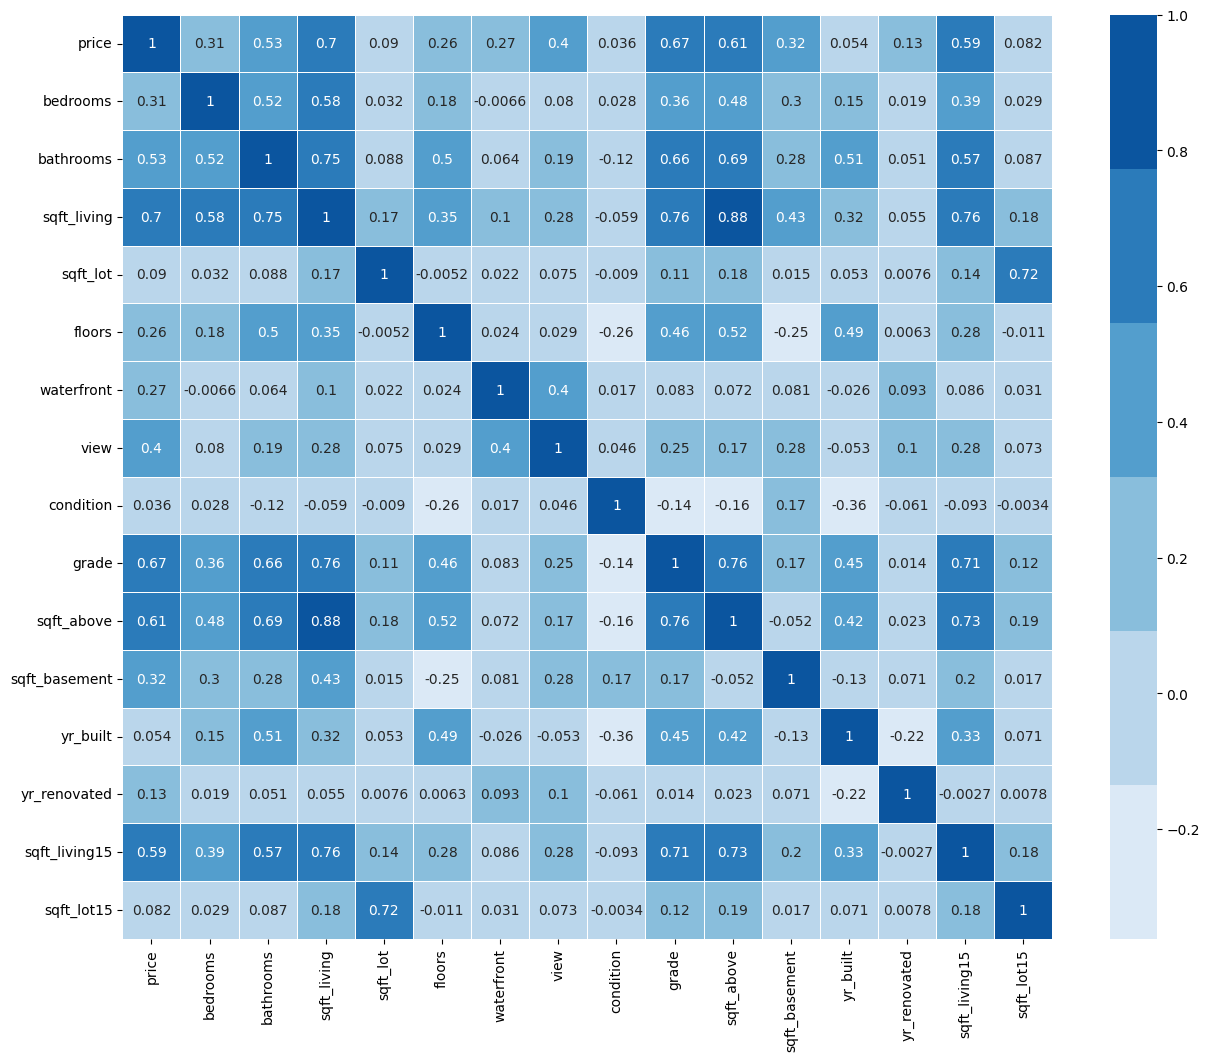

In [20]:
# Melhor visualização  da correlação
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot = True)

In [21]:
# data = data.values[:,:]
#np.random.shuffle(data)
#data.sample(frac=1) # embaralha o dataframe

<Axes: >

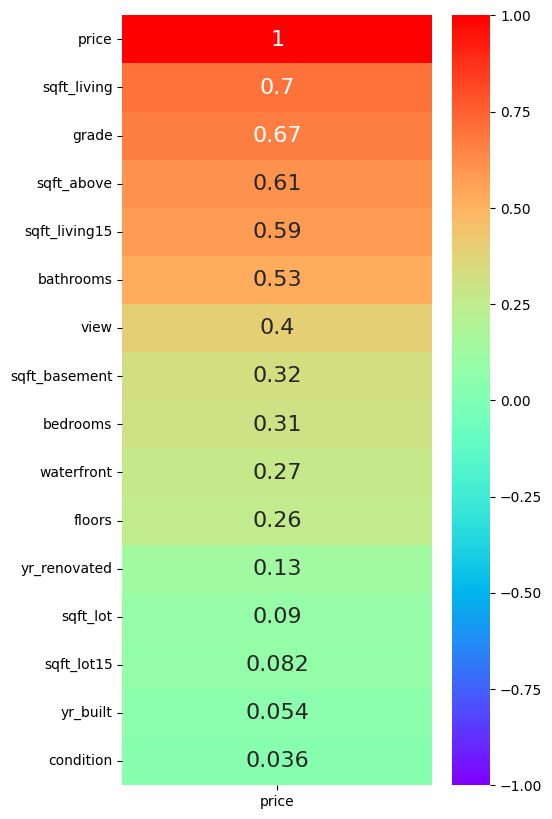

In [22]:
top_features = data.corr()[['price']].sort_values(by=['price'],ascending=False).head(30)
plt.figure(figsize=(5,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=-1)

In [23]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.5 MB/s eta 0:00:00


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.models import save_model

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.preprocessing import StandardScaler # To standardize the data
from sklearn.ensemble import IsolationForest # To find and eliminate the outliers.
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback in the NN
from keras.optimizers import Adam # Optimizer used in the NN
from kerastuner.tuners import RandomSearch # HyperParameter Tunining
import warnings
warnings.filterwarnings('ignore')

<ipython-input-25-879f0b217247>:13: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.



In [26]:
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters

In [27]:
from sklearn import preprocessing

In [28]:
import keras.backend as K

def mape(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                             K.epsilon(),
                                             None))
    return 100. * K.mean(diff, axis=-1)

In [29]:
data.reset_index(drop=True, inplace=True)

In [30]:
y = data['price']
X = data.iloc[:, 1:16]
print(y.shape)
print(X.shape)

(21611,)
(21611, 15)


In [31]:
data['new_price'] = np.nan

In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [33]:
scale = StandardScaler()
X_train = scale.fit_transform(X_scale)
y_train = y
# X_test = scale.transform(X_test)

In [34]:
# # separa os dados em treinamento e teste de forma aleatória
# from sklearn.model_selection import train_test_split 

# X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.20, random_state=42)

In [35]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss=mape,
        metrics=mape)
    return model

In [36]:
tuner = RandomSearch(
    build_model,
    objective='mape',
    max_trials=10,
    executions_per_trial=3,
    directory='model_dir',
    project_name='predict_price')
tuner.search_space_summary()

Search space summary
Default search space size: 4
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_idx = 0
i = 1

for train_idx, val_idx in kf.split(X_train, y_train):
  
    # Separe os dados em treino e validação para cada fold
    X_train_fold, y_train_fold = X_train[train_idx], y_train[train_idx]
    X_val_fold, y_val_fold = X_train[val_idx], y_train[val_idx]

    # Treine o modelo no conjunto de treino do fold
    tuner.search(X_train_fold, y_train_fold, epochs=100, validation_split=0.1, verbose=1)  # alteração aqui
    best_model = tuner.get_best_models(num_models=1)[0]

    # Faça as previsões no conjunto de validação do fold
    y_pred_fold = best_model.predict(X_val_fold)
    save_model(best_model, f'GABRIELA_E_LUCAS_RNA_FOLD_{i}.h5')

    # Adicione as previsões ao conjunto de dados original
    data.loc[val_idx, 'new_price'] = y_pred_fold

    fold_idx += 1
    i += 1

Trial 10 Complete [00h 19m 09s]
mape: 23.646389643351238

Best mape So Far: 15.8467435836792
Total elapsed time: 03h 15m 47s
136/136 [==============================] - 1s 4ms/step


136/136 [==============================] - 1s 6ms/step


136/136 [==============================] - 1s 6ms/step


136/136 [==============================] - 1s 3ms/step


In [38]:
y_pred = data['new_price']
y_test = data['price']
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.17706364839212013


In [39]:
dt_outcomes = pd.DataFrame({'Predicted value': np.array(y_pred).flatten(), 'Actual value': np.array(y_test).flatten()})
dt_outcomes = dt_outcomes.reset_index()

In [40]:
dt_outcomes

,index,Predicted value,Actual value
0,0,324016.593750,221900.0
1,1,669518.312500,538000.0
2,2,180636.703125,180000.0
3,3,464378.250000,604000.0
4,4,320343.000000,510000.0
...,...,...,...
21606,21606,431672.250000,360000.0
21607,21607,365697.312500,400000.0
21608,21608,321865.343750,402101.0
21609,21609,426359.781250,400000.0


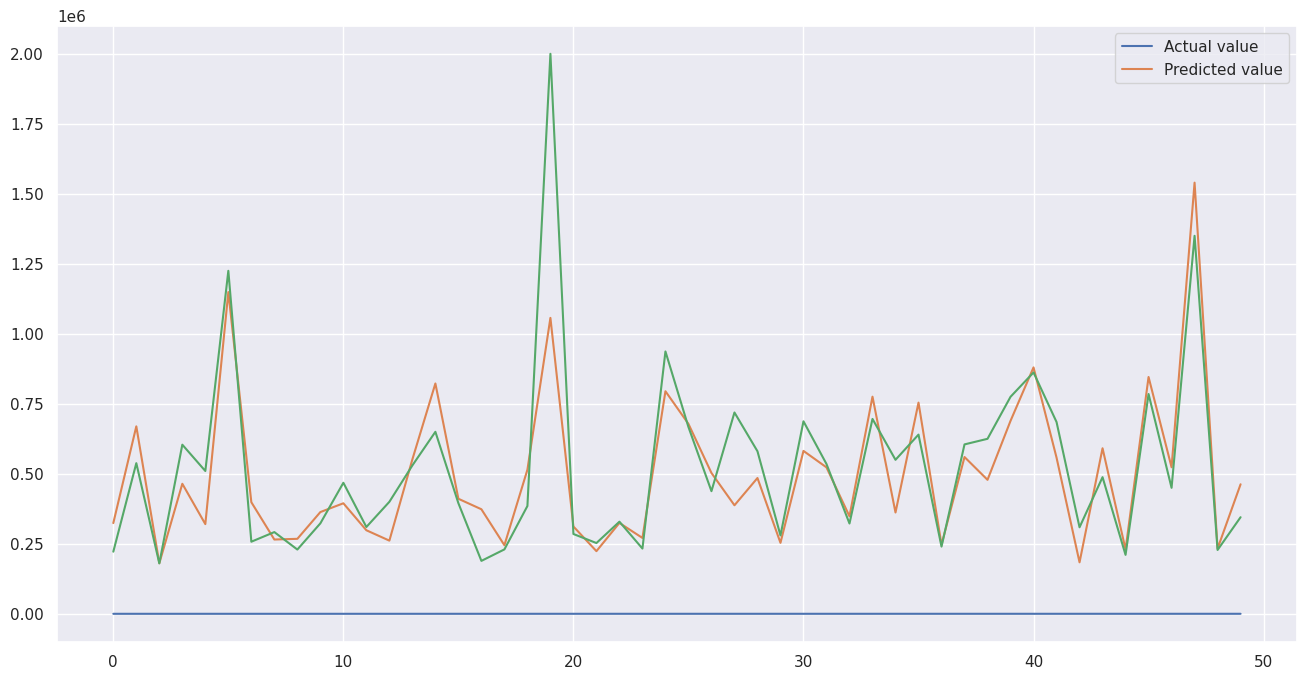

In [73]:
# criando um dataframe com y_test e dt_predicao
fig= plt.figure(figsize=(16,8))
dt_outcomes = dt_outcomes.reset_index()
dt_outcomes = dt_outcomes.drop(['index'],axis=1)
plt.plot(dt_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

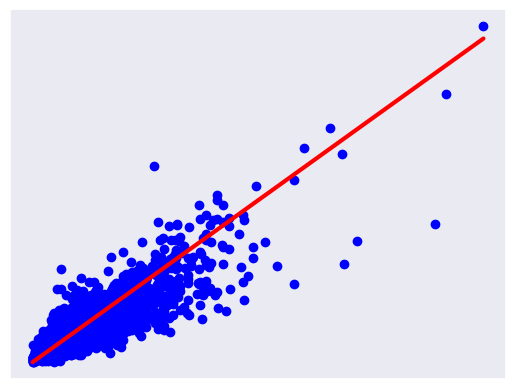

In [42]:
plt.scatter(y_test, y_pred, color="blue")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


In [43]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,new_price
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,1340,5650,324016.593750
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,1690,7639,669518.312500
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,2720,8062,180636.703125
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,1360,5000,464378.250000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,1800,7503,320343.000000


In [44]:
data.shape

(21611, 17)

In [45]:
data.to_csv('data_new_price.csv', index=False)

In [46]:
import os

print(os.getcwd())

/content


In [47]:
data_diff = np.absolute(y_test - y_pred)
print("Min regr_diff: ", np.min(data_diff), "Max regr_diff", np.max(data_diff))

Min regr_diff:  7.203125 Max regr_diff 3561289.0


In [88]:
import plotly.graph_objs as go
import numpy as np

# Suponha que y_pred, y_test e x já foram definidos

idx_sort = np.argsort(y_test)[::-1]  # ordena índices em ordem decrescente

y_test_sorted = y_test[idx_sort]
y_pred_sorted = y_pred[idx_sort]
x_sorted = np.linspace(0, 21610, len(y_test_sorted))

fig = go.Figure()

# Adiciona os dados de y_pred e y_test como linhas no gráfico
fig.add_trace(go.Scatter(x=x_sorted, y=y_pred_sorted, mode='lines', name='y_pred'))
fig.add_trace(go.Scatter(x=x_sorted, y=y_test_sorted, mode='lines', name='y_test'))

# Define o título e os rótulos dos eixos do gráfico
fig.update_layout(title='Gráfico de y_pred e y_test ordenado por y_test decrescente',
                  xaxis_title='x',
                  yaxis_title='y')

# Adiciona o texto com os valores de x e y quando o mouse estiver sobre o gráfico
fig.update_traces(hovertemplate='x=%{x:.2f}, y=%{y:.2f}')

fig.show()





In [96]:
idx_sort = np.argsort(y_test)[::-1]  # ordena índices em ordem decrescente

y_test_sorted = y_test[idx_sort][:1000]
y_pred_sorted = y_pred[idx_sort][:1000]
x_sorted = np.linspace(0, 21610, len(y_test_sorted))[:1000]

fig = go.Figure()

# Adiciona os dados de y_pred e y_test como linhas no gráfico
fig.add_trace(go.Scatter(x=x_sorted, y=y_pred_sorted, mode='lines', name='y_pred'))
fig.add_trace(go.Scatter(x=x_sorted, y=y_test_sorted, mode='lines', name='y_test'))

# Define o título e os rótulos dos eixos do gráfico
fig.update_layout(title='Gráfico de y_pred e y_test ordenado por y_test decrescente',
                  xaxis_title='x',
                  yaxis_title='y')

# Adiciona o texto com os valores de x e y quando o mouse estiver sobre o gráfico
fig.update_traces(hovertemplate='x=%{x:.2f}, y=%{y:.2f}')

fig.show()
